In [1]:
# Victor Z
# UW-Madison, 2024
# covariance and correlation matrix for gibbs reactor

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# covariance and correlation matrix for gibbs reactor
np.random.seed(1)

# Load data
path = '/content/drive/MyDrive/StatsBookCode/Python/'
filename = path+'Data/gibbs_covariance.dat'
data = np.loadtxt(filename)

# Perturb data with noise
# note that results will vary from Matlab because of different seed
data[:, 0] += np.random.normal(0, 10, 250)
data[:, 1] += np.random.normal(0, 0.1, 250)
data[:, 2] += np.random.normal(0, 10, 250)
data[:, 3] += np.random.normal(0, 10, 250)
data[:, 4] += np.random.normal(0, 10, 250)

# Get mean
m = np.mean(data, axis=0)

# Get variance
v = np.var(data, axis=0)

# Get std dev
s = np.sqrt(v)

# Get covariance matrix
C = np.cov(data, rowvar=False)

print(pd.DataFrame(C))

            0         1           2           3           4
0  760.119418  2.033761 -158.895064 -357.979405  205.364492
1    2.033761  0.016232   -0.480194   -1.154372    0.489466
2 -158.895064 -0.480194  148.820713  101.872929  -41.404339
3 -357.979405 -1.154372  101.872929  303.909847 -114.440626
4  205.364492  0.489466  -41.404339 -114.440626  166.018598


In [6]:
# Get correlation matrix
R = np.corrcoef(data, rowvar=False)

print(pd.DataFrame(R))

          0         1         2         3         4
0  1.000000  0.578998 -0.472430 -0.744809  0.578104
1  0.578998  1.000000 -0.308961 -0.519747  0.298169
2 -0.472430 -0.308961  1.000000  0.479021 -0.263412
3 -0.744809 -0.519747  0.479021  1.000000 -0.509483
4  0.578104  0.298169 -0.263412 -0.509483  1.000000


In [7]:
# Get eigenvalues of covariance matrix
lambda_ = np.linalg.eigvals(C)

print(pd.DataFrame(np.sort(lambda_)))

             0
0     0.010435
1    89.503507
2   105.304847
3   122.310056
4  1061.755962


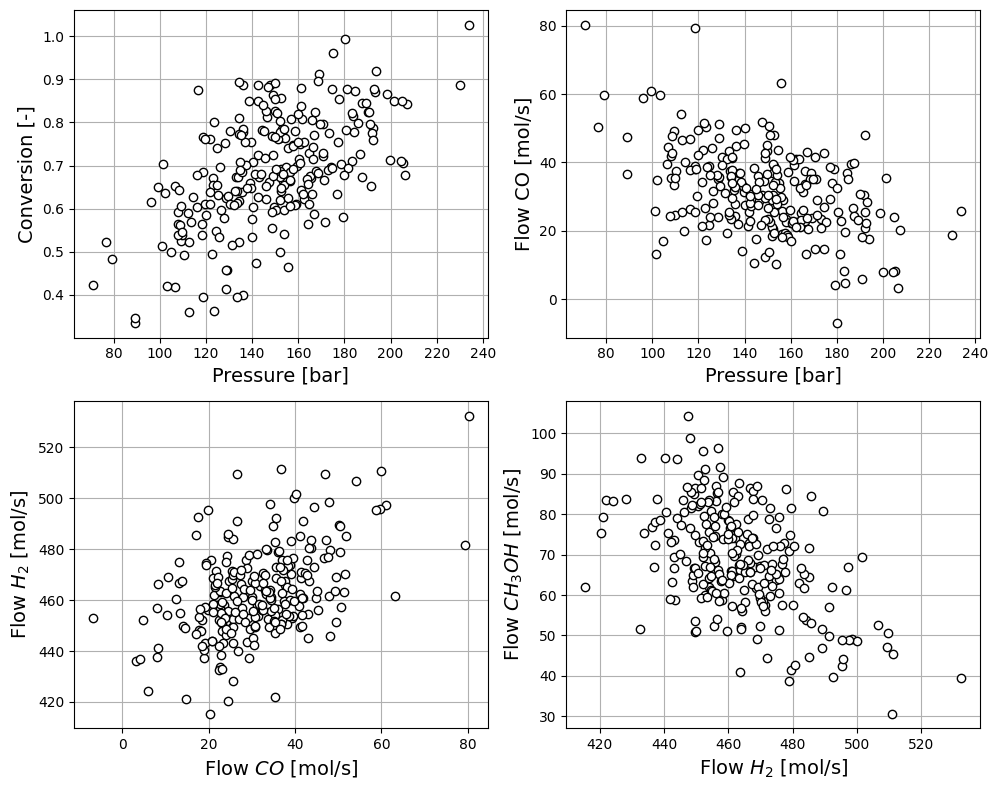

In [8]:
# Plot data
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.plot(data[:, 0], data[:, 1], 'ko', markerfacecolor='w')
plt.xlabel('Pressure [bar]', fontsize=14)
plt.ylabel('Conversion [-]', fontsize=14)
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(data[:, 0], data[:, 2], 'ko', markerfacecolor='w')
plt.xlabel('Pressure [bar]', fontsize=14)
plt.ylabel('Flow CO [mol/s]', fontsize=14)
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(data[:, 2], data[:, 3], 'ko', markerfacecolor='w')
plt.ylabel('Flow $H_2$ [mol/s]', fontsize=14)
plt.xlabel('Flow $CO$ [mol/s]', fontsize=14)
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(data[:, 3], data[:, 4], 'ko', markerfacecolor='w')
plt.ylabel('Flow $CH_3OH$ [mol/s]', fontsize=14)
plt.xlabel('Flow $H_2$ [mol/s]', fontsize=14)
plt.grid(True)

plt.tight_layout()

In [10]:
# Re-scale variables
m = np.mean(data, axis=0)
v = np.var(data, axis=0)
s = np.sqrt(v)

# Scale
data_scaled = (data - m) / s

# Get covariance matrix
CC = np.cov(data_scaled, rowvar=False)

print(pd.DataFrame(CC))

# Get correlation matrix
R = np.corrcoef(data_scaled, rowvar=False)

print(pd.DataFrame(R))

# Get eigenvalues of covariance matrix
lambda_ = np.linalg.eigvals(CC)

print(pd.DataFrame(np.sort(lambda_)))

          0         1         2         3         4
0  1.004016  0.581324 -0.474328 -0.747800  0.580426
1  0.581324  1.004016 -0.310202 -0.521834  0.299367
2 -0.474328 -0.310202  1.004016  0.480945 -0.264470
3 -0.747800 -0.521834  0.480945  1.004016 -0.511529
4  0.580426  0.299367 -0.264470 -0.511529  1.004016
          0         1         2         3         4
0  1.000000  0.578998 -0.472430 -0.744809  0.578104
1  0.578998  1.000000 -0.308961 -0.519747  0.298169
2 -0.472430 -0.308961  1.000000  0.479021 -0.263412
3 -0.744809 -0.519747  0.479021  1.000000 -0.509483
4  0.578104  0.298169 -0.263412 -0.509483  1.000000
          0
0  0.240139
1  0.385682
2  0.686105
3  0.747717
4  2.960438


In [11]:
# Compute conditional density
Cr = C[[1, 0, 2, 3, 4]][:, [1, 0, 2, 3, 4]]
mr = m[[1, 0, 2, 3, 4]]

# Compute quantities
Sig11 = Cr[0, 0]
Sig22 = Cr[1:, 1:]
mu2 = mr[1:]
mu1 = mr[0]
Sig12 = Cr[1:, 0]
Sig21 = Sig12
x2p = mr[1:]

# Conditional density
mu1g2 = mu1 + np.dot(Sig12.T, np.linalg.inv(Sig22)) @ (x2p - mu2)
Sig1g2 = Sig11 - np.dot(Sig12.T, np.linalg.inv(Sig22)) @ Sig21

print("Conditional Mean (mu1|mu2):", mu1g2)
print("Conditional Variance (Sig1|Sig2):", Sig1g2)

Conditional Mean (mu1|mu2): 0.6895756762948305
Conditional Variance (Sig1|Sig2): 0.010435426620778315
